# Exploratory Data Analysis (EDA)

## 1: Dataset Overview & Initial Cleaning

This section introduces the dataset and performs essential structural cleaning before deeper analysis.

The dataset consists of Palestinian news articles from 2023 to 2025. Each record contains:

- `title`: Article headline
- `content`: Full news text
- `date`: Publication date
- `platform`: Source (e.g., Al Jazeera, Misbar)
- `label`: Target classification (`real` or `fake`)

### 1.1 Load and Preview

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

# Arabic text handling
import re
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from collections import Counter

# NLTK for Arabic stopwords/tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Warnings off
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Walid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Walid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load dataset
news_df = pd.read_csv("../data/raw/original_news_data.csv", encoding='utf-8')

In [3]:
# preview data
display(news_df.head())
display(news_df.tail())
news_df.info()

Id                 date   platform  \
0   1  2023-01-11 00:00:00  Aljazeera   
1   2  2023-01-11 00:00:00  Aljazeera   
2   3  2023-01-11 00:00:00  Aljazeera   
3   4  2023-02-11 00:00:00  Aljazeera   
4   5  2023-03-11 00:00:00  Aljazeera   

                                               title  \
0  ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©.. ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ŸäŸáÿØŸÖ 17 ŸÖŸÜÿ≤ŸÑÿß ÿ™ÿßÿ±ŸäÿÆŸäÿß...   
1  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ŸÖÿØŸÜ ÿ£Ÿàÿ±Ÿàÿ®Ÿäÿ© ÿ™ÿ∂ÿßŸÖŸÜÿß ŸÖÿπ ÿ∫ÿ≤ÿ© Ÿàÿ≠ÿ¥ŸàÿØ ÿ£ŸÖÿßŸÖ ...   
2  ÿ¥ŸáÿØÿßÿ° ŸÅŸä ÿ¨ŸÜŸäŸÜ Ÿàÿ∑ŸàŸÑŸÉÿ±ŸÖ Ÿàÿ•ÿ∂ÿ±ÿßÿ® ÿπÿßŸÖ ÿ®ÿßŸÑÿ∂ŸÅÿ© ÿßŸÑÿ∫ÿ±ÿ®Ÿä...   
3  ÿ£ÿ®Ÿà ÿπÿ®ŸäÿØÿ©: ÿÆÿ≥ÿßÿ¶ÿ± ÿßŸÑÿπÿØŸà ÿ£ŸÉÿ®ÿ± ÿ®ŸÉÿ´Ÿäÿ± ŸÖŸÖÿß ŸäÿπŸÑŸÜ Ÿàÿ≥ŸÜ...   
4         9 ÿ¥ŸáÿØÿßÿ° ÿ®ÿßŸÑÿ∂ŸÅÿ© ŸàÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ Ÿäÿ¥ŸÜ ÿ≠ŸÖŸÑÿ© ÿßÿπÿ™ŸÇÿßŸÑÿßÿ™   

                                        News content Label  
0  ŸáÿØŸÖÿ™ ŸÇŸàÿßÿ™ ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä -ÿßŸÑŸäŸàŸÖ ÿßŸÑÿ£ÿ±ÿ®ÿπÿßÿ°-...  real  
1  ÿÆÿ±ÿ¨ÿ™ ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ŸÅŸä ÿπÿØÿØ ŸÖŸÜ ÿßŸÑŸÖÿØŸÜ ÿßŸÑÿ£Ÿàÿ±Ÿàÿ®Ÿäÿ© ŸÖÿ≥ÿßÿ° ÿßŸÑ...  real  
2  ÿßÿ≥ÿ™ÿ¥ŸáÿØ 4 ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ Ÿàÿßÿπÿ™ŸÇŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿ¢ÿÆÿ±ŸàŸÜ -ÿßŸÑŸäŸàŸÖ ÿß...  real  
3  ÿ£ŸÉÿØ ÿßŸÑŸÜÿßÿ∑ŸÇ ÿ®ÿßÿ≥ŸÖŸÉÿ™ÿßÿ¶ÿ® ÿßŸÑÿ¥ŸáŸäÿØ ÿπÿ≤ ÿßŸÑÿØŸäŸÜ ÿßŸÑŸÇÿ≥ÿßŸÖ-ÿßŸÑ...  real  
4  ÿßÿ≥ÿ™ÿ¥ŸáÿØ 9 ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸÅŸä ŸÖŸàÿßÿ¨Ÿáÿßÿ™ ÿßŸÜÿØŸÑÿπÿ™ ŸÖÿπ ŸÇŸàÿßÿ™ ÿß...  real

Id                 date   platform  \
5347  5348  2025-05-30 00:00:00  Aljazeera   
5348  5349  2025-05-30 00:00:00     Misbar   
5349  5350  2025-05-30 00:00:00  Aljazeera   
5350  5351  2025-05-30 00:00:00  Aljazeera   
5351  5352  2025-05-30 00:00:00     Misbar   

                                                  title  \
5347  ÿßŸÑÿ≠ÿ±ÿ® ÿπŸÑŸâ ÿ∫ÿ≤ÿ© ŸÖÿ®ÿßÿ¥ÿ±.. ŸÖÿ¨ÿßÿ≤ÿ± ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ© ÿ®ŸÖÿ±ÿßŸÉÿ≤ "...   
5348  ÿßŸÑÿµŸàÿ±ÿ© ŸÑŸäÿ≥ÿ™ ŸÑÿ¨ŸÜÿØŸä ŸÖÿ∫ÿ±ÿ®Ÿä ÿ≥ŸÇÿ∑ ŸÅŸä ŸÉŸÖŸäŸÜ ŸÑŸÑŸÖŸÇÿßŸàŸÖÿ© ÿß...   
5349  ŸÖÿ∏ÿßŸáÿ±ÿßÿ™ ÿ®ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ ÿ™ÿ∑ÿßŸÑÿ® ÿ®ÿ•ŸÉŸÖÿßŸÑ ÿßŸÑÿµŸÅŸÇÿ© Ÿàÿ¨ÿØŸÑ ÿ≠ŸàŸÑ ...   
5350  ÿ≤ŸÉÿ±Ÿäÿß ÿßŸÑÿ≤ÿ®ŸäÿØŸä ÿ≠ÿ±ÿß.. "ÿßŸÑÿ™ŸÜŸäŸÜ" ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸä ÿßŸÑÿ∞Ÿä Ÿáÿ≤...   
5351  ŸÅŸäÿØŸäŸà ŸÇÿØŸäŸÖ ŸÑŸÖÿπÿ™ŸÖÿ± ŸäÿØÿπŸà ŸÑÿ∫ÿ≤ÿ© ÿÆŸÑÿßŸÑ ÿ∑ŸàÿßŸÅŸá ŸÅŸä ÿßŸÑÿ≠ÿ±...   

                                           News content Label  
5347  ŸÅŸä ÿßŸÑŸäŸàŸÖ ÿßŸÑŸÄ77 ŸÖŸÜ ÿßÿ≥ÿ™ÿ¶ŸÜÿßŸÅ ÿ≠ÿ±ÿ® ÿßŸÑÿ•ÿ®ÿßÿØÿ© ÿπŸÑŸâ ÿ∫ÿ≤ÿ©ÿå...  real  
5348  ÿ™ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ®ÿßÿ™ ÿπŸÑŸâ ŸÖŸàŸÇÿπ ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸä ÿ•ŸÉÿ≥ÿå ...  fake  
5349  ÿ™ÿ∏ÿßŸáÿ± ŸÖÿ≠ÿ™ÿ¨ŸàŸÜ Ÿàÿ≥ÿ∑ ÿ™ŸÑ ÿ£ÿ®Ÿäÿ® ŸÑŸäŸÑ ÿßŸÑÿßÿ´ŸÜŸäŸÜ Ÿàÿ£ÿ∂ÿ±ŸÖŸàÿß ÿß...  real  
5350  ŸÑŸÖ ŸäŸÉŸÜ ŸÅŸä ŸÖÿÆŸäŸÑÿ© Ÿàÿ≤Ÿäÿ± ÿßŸÑÿ£ŸÖŸÜ ÿßŸÑŸÇŸàŸÖŸä ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿß...  real  
5351  ÿ™ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ®ÿßÿ™ ŸàÿµŸÅÿ≠ÿßÿ™ ÿπŸÑŸâ ŸÖŸàÿßŸÇÿπ ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑÿßÿ¨ÿ™ŸÖÿß...  fake

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            5352 non-null   int64 
 1   date          5352 non-null   object
 2   platform      5352 non-null   object
 3   title         5352 non-null   object
 4   News content  5352 non-null   object
 5   Label         5352 non-null   object
dtypes: int64(1), object(5)
memory usage: 251.0+ KB


In [4]:
print("Unique values per column:")
print(news_df.nunique())

print("\nDuplicate rows total:", news_df.duplicated().sum())

Unique values per column:
Id              5352
date            1835
platform          26
title           5051
News content    5329
Label              2
dtype: int64

Duplicate rows total: 0


We observe that some columns are inconsistently named (`Label`, `News content`, `Id`). We'll fix naming and data types next.


### 1.2 Rename Columns & Fix Types

In [5]:
# Rename columns to follow snake_case convention
news_df.rename(columns={
    'Id': 'id',
    'News content': 'content',
    'Label': 'label'
}, inplace=True)

# Convert `date` to datetime format
news_df['date'] = pd.to_datetime(news_df['date'])

In [6]:
# Summary statistics
news_df.describe(include='all').T

count unique                                                top  \
id        5352.0    NaN                                                NaN   
date        5352    NaN                                                NaN   
platform    5352     26                                          Aljazeera   
title       5352   5051                              ÿπÿßÿ¨ŸÑ | ŸÖÿ±ÿßÿ≥ŸÑ #ÿßŸÑÿ¨ÿ≤Ÿäÿ±ÿ©   
content     5352   5329  ÿ™ÿ™ÿØÿßŸàŸÑ ÿ≠ÿ≥ÿßÿ®ÿßÿ™ ŸàÿµŸÅÿ≠ÿßÿ™ ÿπŸÑŸâ ŸÖŸàÿßŸÇÿπ ÿßŸÑÿ™ŸàÿßÿµŸÑ ÿßŸÑÿßÿ¨ÿ™ŸÖÿß...   
label       5352      2                                               real   

          freq                           mean                  min  \
id         NaN                         2676.5                  1.0   
date       NaN  2024-07-08 18:42:08.402466560  2011-03-20 00:00:00   
platform  3422                            NaN                  NaN   
title       32                            NaN                  NaN   
content      2                            NaN                  NaN   
label     3913                            NaN                  NaN   

                          25%                  50%                  75%  \
id                    1338.75               2676.5              4014.25   
date      2024-01-03 00:00:00  2024-08-04 17:34:00  2024-11-25 00:00:00   
platform                  NaN                  NaN                  NaN   
title                     NaN                  NaN                  NaN   
content                   NaN                  NaN                  NaN   
label                     NaN                  NaN                  NaN   

                          max          std  
id                     5352.0  1545.133651  
date      2025-06-23 00:00:00          NaN  
platform                  NaN          NaN  
title                     NaN          NaN  
content                   NaN          NaN  
label                     NaN          NaN

Now the dataframe has standardized column names and a valid datetime index.

### 1.3 Check for Nulls and Duplicates

In [7]:
# Null values check
news_df.isnull().sum()

id          0
date        0
platform    0
title       0
content     0
label       0
dtype: int64

In [8]:
# Check duplicates in key text fields
def check_duplicate(col):
    duplicate_count = news_df[col].duplicated().sum()
    return f"{col}: Duplicated entries = {duplicate_count}"

cols_dp = [check_duplicate(col) for col in news_df[["title", "content"]]]
cols_dp

['title: Duplicated entries = 301', 'content: Duplicated entries = 23']

As shown, there is 301 duplicated entries in "title" field, and 23 in "News content" field

In [9]:
# Remove duplicates
# First remove content duplicates (same article with reworded titles),
# then remove remaining title duplicates (exact reposts)
news_df = news_df.drop_duplicates(subset=['content'])
news_df = news_df.drop_duplicates(subset=['title'])

We first drop content duplicates to remove reworded headlines with same text, then title duplicates to clean up repeated coverage.

## 2. Label Distribution

In this section, we examine the distribution of real and fake news articles in the dataset.

Understanding class balance is essential before model training, as imbalance can bias the model toward the majority class. We‚Äôll visualize the label frequencies and compute exact proportions.


### 2.1 Distribution Count and Proportions

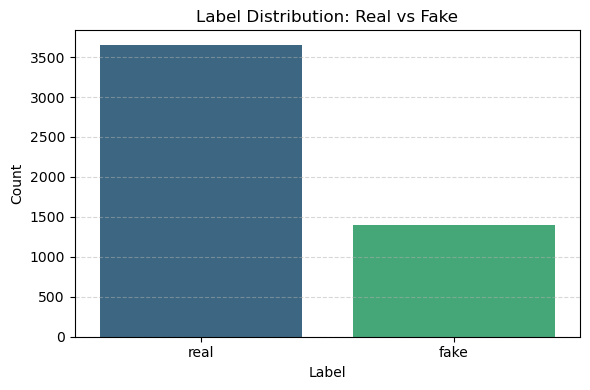

In [10]:
# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=news_df, x='label', palette='viridis')

plt.title("Label Distribution: Real vs Fake")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Display numeric distribution
label_counts = news_df['label'].value_counts()
total = label_counts.sum()

for label, count in label_counts.items():
    percentage = (count / total) * 100
    print(f"{label}: {count} articles ({percentage:.2f}%)")

real: 3652 articles (72.30%)
fake: 1399 articles (27.70%)


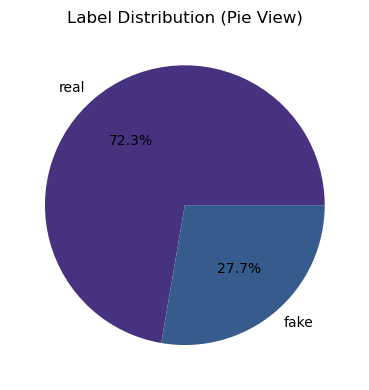

In [12]:
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title("Label Distribution (Pie View)")
plt.tight_layout()
plt.show()


### Observations:

- The dataset is **moderately imbalanced**, with ~72% real and ~28% fake.

- While not extreme, the imbalance may skew classification metrics such as accuracy.

- **Precision**, **recall**, **F1**, or **AUC** will be more reliable than accuracy during evaluation.

- We will address this later using:

    - Resampling (SMOTE, undersampling)

    - Class weights

    - Threshold tuning

## 3. Platform & Source Analysis

We examine where the news originates from to understand platform influence and credibility. This includes:
- Identifying top contributing sources
- Grouping rare platforms to reduce noise
- Analyzing how platform relates to label (fake vs. real)

In [13]:
# Top platforms by frequency
plt.figure(figsize=(10, 5))
top_platforms = news_df['platform'].value_counts().head(15)

sns.barplot(x=top_platforms.values, y=top_platforms.index, palette="viridis")
plt.title("Top 15 News Platforms")
plt.xlabel("Number of Articles")
plt.ylabel("Platform")
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add count labels next to bars
for i, v in enumerate(top_platforms.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=9)
    
plt.tight_layout()
plt.show()

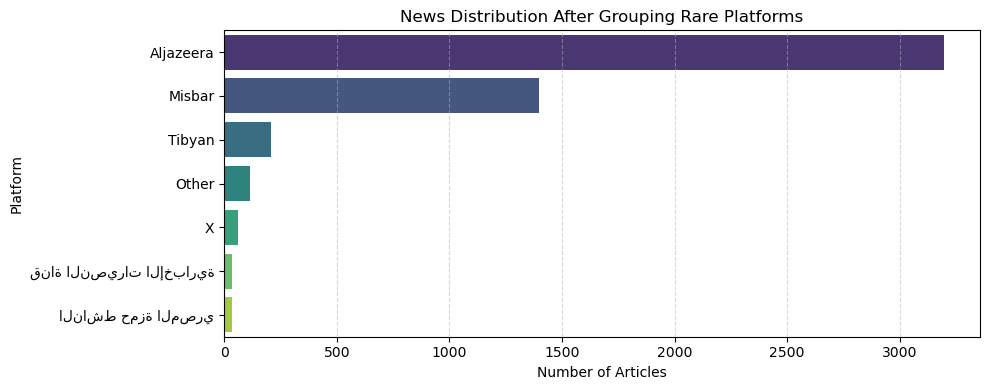

In [14]:
# Count platform occurrences
platform_counts = news_df['platform'].value_counts()

# Set a threshold (e.g., keep only platforms with >= 10 entries)
threshold = 30

# Create a new column grouping rare platforms as "Other"
news_df['platform_grouped'] = news_df['platform'].apply(
    lambda x: x if platform_counts[x] >= threshold else 'Other'
)

# Visualize new distribution after grouping
plt.figure(figsize=(10, 4))
sns.countplot(data=news_df, y='platform_grouped', order=news_df['platform_grouped'].value_counts().index, palette="viridis")

plt.title("News Distribution After Grouping Rare Platforms")
plt.xlabel("Number of Articles")
plt.ylabel("Platform")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

To reduce the effect of long-tail platforms that appear fewer than 30 times, we grouped them under the label "Other"

In [15]:
# Cross-tab (normalized row-wise)
platform_label_crosstab = pd.crosstab(
    news_df['platform_grouped'],
    news_df['label'],
    normalize='index'
)

# Plot stacked bar chart
platform_label_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='viridis',
    edgecolor='black'
)

plt.title("Proportion of Fake vs Real News by Platform")
plt.xlabel("Platform")
plt.ylabel("Proportion of Articles")
plt.legend(title="Label", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.xticks(rotation=15)
plt.show()


### Observations & Insights

- **Top Contributors:** Al Jazeera, Misbar, and Tibyan dominate the dataset.
- **Platform Bias:** Al Jazeera contributes mostly real news, while Misbar and X are skewed toward fake.
- **Rare Sources:** Grouping platforms with <30 articles into "Other" improved readability.
- **Implication:** Platform source is a strong feature ‚Äî possibly encoding credibility or agenda. This insight will guide modeling and bias mitigation later.

## 4. Text Length Analysis
This section explores article length patterns to understand writing styles across real and fake news. We analyze both titles and full content using word counts and visualizations.

In [16]:
# Add new columns for word count
news_df['title_length'] = news_df['title'].apply(lambda x: len(str(x).split()))
news_df['content_length'] = news_df['content'].apply(lambda x: len(str(x).split()))

In [17]:
for col in ['title_length', 'content_length']:
    print(f"{col}:")
    print(f"  Mean:   {news_df[col].mean():.2f}")
    print(f"  Median: {news_df[col].median():.2f}")
    print(f"  Std:    {news_df[col].std():.2f}")
    print(f"  Min:    {news_df[col].min()}")
    print(f"  Max:    {news_df[col].max()}")
    print()


title_length:
  Mean:   9.62
  Median: 10.00
  Std:    4.53
  Min:    1
  Max:    59

content_length:
  Mean:   228.58
  Median: 45.00
  Std:    417.64
  Min:    1
  Max:    10717



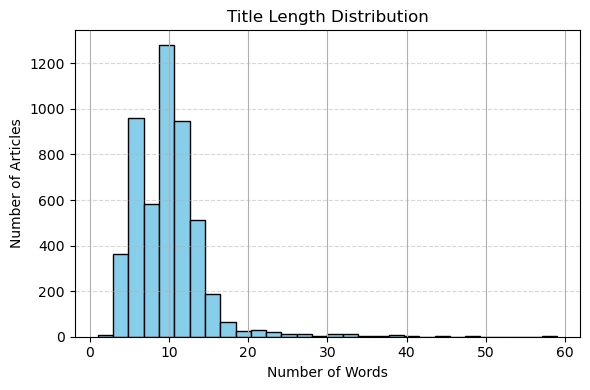

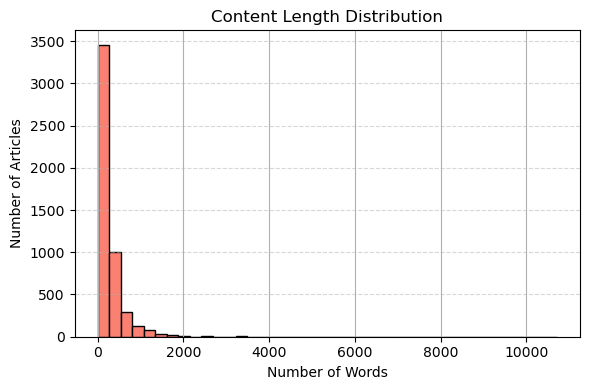

In [18]:
# Histogram for title length
plt.figure(figsize=(6, 4))
news_df['title_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Title Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histogram for content length
plt.figure(figsize=(6, 4))
news_df['content_length'].hist(bins=40, color='salmon', edgecolor='black')
plt.title("Content Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


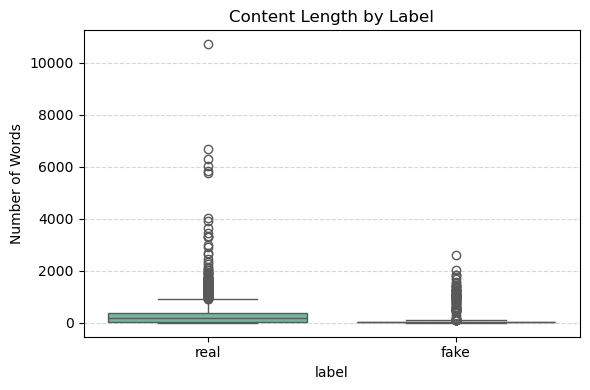

In [19]:
# Compare Real vs Fake text lengths
plt.figure(figsize=(6, 4))
sns.boxplot(data=news_df, x='label', y='content_length', palette="Set2")
plt.title("Content Length by Label")
plt.ylabel("Number of Words")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Text Length Analysis

We engineered two features:
- `title_length`: word count per title
- `content_length`: word count per article body

**Observations:**
- Titles are consistently around 10 words.
- Content is extremely variable (1 to 10,717 words), with a strong right skew.
- Real news articles tend to be much longer and more detailed than fake ones.

This suggests `content_length` could be a useful feature for model training.

Next steps:
- Consider truncating/padding content to ~1000 words.
- Normalize or log-transform for better model fit.


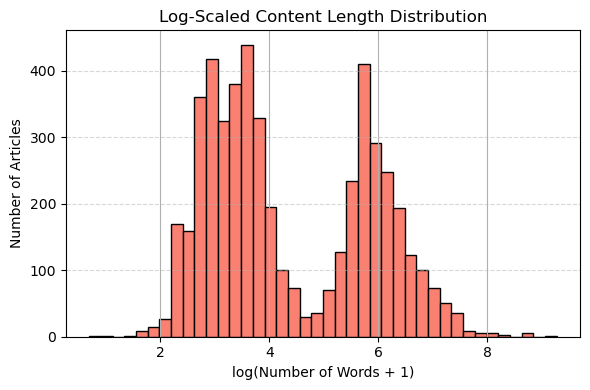

In [20]:
plt.figure(figsize=(6, 4))
news_df['content_length'].apply(lambda x: np.log1p(x)).hist(bins=40, color='salmon', edgecolor='black')
plt.title("Log-Scaled Content Length Distribution")
plt.xlabel("log(Number of Words + 1)")
plt.ylabel("Number of Articles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [21]:
# Filter out extreme outliers using Z-score method
filtered = news_df[np.abs(zscore(news_df['content_length'])) < 3]

# Plot boxplot after outlier removal
sns.boxplot(data=filtered, x='label', y='content_length', palette="Set2")
plt.title("Outlier-Filtered Content Length by Label")
plt.ylabel("Number of Words")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Key Observations

- `title_length` has a consistent distribution (~10 words on average).
- `content_length` is heavily right-skewed, ranging from 1 to over 10,000 words.
- Real news articles tend to be significantly longer than fake ones.
- After log-transforming and filtering outliers, we observe a **bimodal distribution**, suggesting different styles or content types.

### Implications
- `content_length` is a highly predictive feature.
- We may use log-transformed versions in modeling.
- Could engineer features like `is_short_article` or `content_length_bin`.

## 5. Word Analysis

We explore lexical differences between real and fake news using word frequency statistics and word clouds.

In [22]:
def clean_arabic_text(text):
    """Remove unsupported unicode, punctuation, and stopwords."""
    text = re.sub(r'[\u2066\u2067\u2068\u2069]', '', text)  # Remove control codes
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)          # Keep Arabic only
    arabic_stopwords = set(stopwords.words('arabic'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in arabic_stopwords]
    return " ".join(tokens)

def reshape_for_wordcloud(text):
    """Apply Arabic reshaping and bidi reordering."""
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)


In [23]:
real_text_raw = " ".join(news_df[news_df['label'] == 'real']['content'].astype(str))
fake_text_raw = " ".join(news_df[news_df['label'] == 'fake']['content'].astype(str))

# Cleaning (stopwords + punctuation)
real_text_clean = clean_arabic_text(real_text_raw)
fake_text_clean = clean_arabic_text(fake_text_raw)

# Prepare display-ready for word cloud
real_text_ready = reshape_for_wordcloud(real_text_clean)
fake_text_ready = reshape_for_wordcloud(fake_text_clean)

In [24]:
real_tokens = word_tokenize(real_text_clean)
real_common_words = Counter(real_tokens).most_common(20)

fake_tokens = word_tokenize(fake_text_clean)
fake_common_words = Counter(fake_tokens).most_common(20)

print("Most common words in Real news:")
for word, count in real_common_words:
    print(f"{word}: {count}")

print("Most common words in Fake news:")
for word, count in fake_common_words:
    print(f"{word}: {count}")

Most common words in Real news:
ÿ∫ÿ≤ÿ©: 7293
ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ: 5815
ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä: 5640
ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ: 4031
ŸÇÿ∑ÿßÿπ: 3512
ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ©: 2953
ÿÆŸÑÿßŸÑ: 2604
ŸàŸÅŸä: 2451
ÿ∫ÿ≤ÿ©ÿå: 2429
ÿßŸÑÿ¨Ÿäÿ¥: 2409
ÿ≠ŸÖÿßÿ≥: 2316
ÿßŸÑŸäŸàŸÖ: 2312
ŸÇŸàÿßÿ™: 2280
ÿßŸÑÿ≠ÿ±ÿ®: 2219
ÿßŸÑŸÖŸÇÿßŸàŸÖÿ©: 1905
ÿßŸÑÿ¨ÿ≤Ÿäÿ±ÿ©: 1886
ÿßŸÑÿ£ŸàŸÑ: 1857
ÿå: 1791
ÿ£ŸÜŸá: 1721
ŸÖÿØŸäŸÜÿ©: 1657
Most common words in Fake news:
ÿ∫ÿ≤ÿ©: 1209
ÿßŸÑÿ™ŸàÿßÿµŸÑ: 625
ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä: 596
ŸÇÿ∑ÿßÿπ: 589
ŸÅŸäÿØŸäŸà: 556
ÿ≠ÿ≥ÿßÿ®ÿßÿ™: 542
ŸÖŸÇÿ∑ÿπ: 532
ÿÆŸÑÿßŸÑ: 518
ÿ£ŸÜŸá: 500
ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ: 471
ÿ≠ÿØŸäÿ´Ÿãÿßÿå: 464
ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ: 457
ŸÖŸàÿßŸÇÿπ: 452
ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ©: 452
ÿ™ÿ™ÿØÿßŸàŸÑ: 429
ÿ≠ŸÖÿßÿ≥: 395
ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿå: 384
ŸÖÿ≥ÿ®ÿßÿ±: 374
ŸàÿµŸÅÿ≠ÿßÿ™: 368
ÿ∫ÿ≤ÿ©ÿå: 367


| Word         | Real Count | Fake Count |
|--------------|------------|------------|
| ÿ∫ÿ≤ÿ©           | 7293       | 1209       |
| ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ       | 5815       | 457        |
| ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä     | 5640       | 596        |
| ÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑ       | 4031       | 471        |
| ŸÇÿ∑ÿßÿπ          | 3512       | 589        |
| ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ©    | 2953       | 452        |
| ÿÆŸÑÿßŸÑ          | 2604       | 518        |
| ŸàŸÅŸä           | 2451       | ‚Äì          |
| ÿ∫ÿ≤ÿ©ÿå          | 2429       | 367        |
| ÿßŸÑÿ¨Ÿäÿ¥         | 2409       | ‚Äì          |
| ÿ≠ŸÖÿßÿ≥          | 2316       | 395        |
| ÿßŸÑŸäŸàŸÖ         | 2312       | ‚Äì          |
| ŸÇŸàÿßÿ™          | 2280       | ‚Äì          |
| ÿßŸÑÿ≠ÿ±ÿ®         | 2219       | ‚Äì          |
| ÿßŸÑŸÖŸÇÿßŸàŸÖÿ©      | 1905       | ‚Äì          |
| ÿßŸÑÿ¨ÿ≤Ÿäÿ±ÿ©       | 1886       | ‚Äì          |
| ÿßŸÑÿ£ŸàŸÑ         | 1857       | ‚Äì          |
| ÿ£ŸÜŸá           | 1721       | 500        |
| ŸÖÿØŸäŸÜÿ©         | 1657       | ‚Äì          |
| ÿßŸÑÿ™ŸàÿßÿµŸÑ       | ‚Äì          | 625        |
| ŸÅŸäÿØŸäŸà         | ‚Äì          | 556        |
| ÿ≠ÿ≥ÿßÿ®ÿßÿ™        | ‚Äì          | 542        |
| ŸÖŸÇÿ∑ÿπ          | ‚Äì          | 532        |
| ÿ≠ÿØŸäÿ´Ÿãÿßÿå       | ‚Äì          | 464        |
| ŸÖŸàÿßŸÇÿπ         | ‚Äì          | 452        |
| ÿ™ÿ™ÿØÿßŸàŸÑ        | ‚Äì          | 429        |
| ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿå     | ‚Äì          | 384        |
| ŸÖÿ≥ÿ®ÿßÿ±         | ‚Äì          | 374        |
| ŸàÿµŸÅÿ≠ÿßÿ™        | ‚Äì          | 368        |


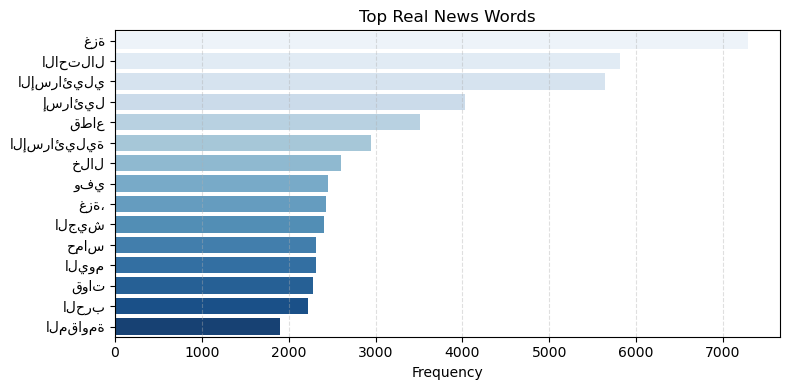

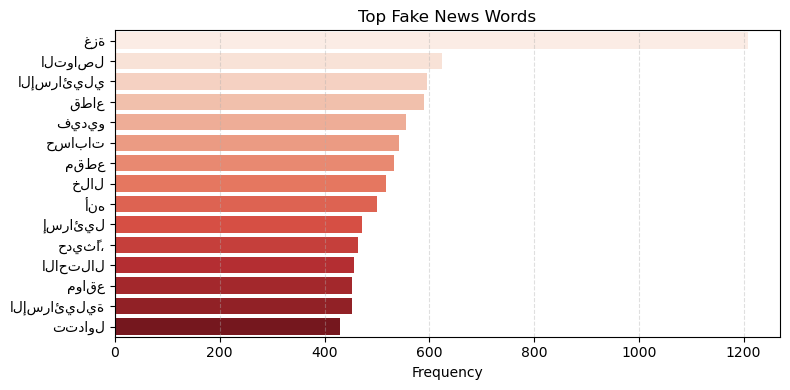

In [25]:
# Plot bar chart of top N words
def plot_top_words(word_freq, title, color):
    words, counts = zip(*word_freq[:15])
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_top_words(real_common_words, "Top Real News Words", "Blues")
plot_top_words(fake_common_words, "Top Fake News Words", "Reds")


In [26]:
# generate word cloud
plt.figure(figsize=(14, 6))

# Real News
plt.subplot(1, 2, 1)
wordcloud_real = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(real_text_ready)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News", fontsize=14)

# Fake News
plt.subplot(1, 2, 2)
wordcloud_fake = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(fake_text_ready)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News", fontsize=14)

plt.tight_layout()
plt.show()

### Observations
- **Real news** articles heavily emphasize **military events** and **political organizations**.
- **Fake news** focuses on **media virality** ‚Äî platforms, videos, and content-sharing behaviors.
- These lexical patterns are distinctive and **strong candidates for feature engineering** (e.g., keyword TF-IDF, presence flags).


## 6. Temporal & Seasonal Trends

We explore how real and fake news volume changes over time to identify seasonality, surges, and misinformation bursts.

This includes weekly and monthly patterns, label breakdowns, and historical relevance filtering.


In [27]:
# Weekly total article count
news_df.set_index('date', inplace=True)
weekly_total = news_df.resample('W').size()

plt.figure(figsize=(14, 4))
weekly_total.plot()
plt.title("Total News Articles Over Time (Weekly Aggregated)")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Article activity is mostly flat until 2023, when volume begins increasing. The 2023 Gaza-Israel conflict marks a sharp surge.


In [28]:
# Articles before 2023
news_df.reset_index(inplace=True)
before_2023 = news_df[news_df['date'] < '2023-01-01']
print(f"Articles before 2023: {before_2023.shape[0]}")
before_2023[['date', 'platform', 'title']].sort_values('date').head(10)

Articles before 2023: 17


date   platform                                              title
1569 2011-03-20  Aljazeera                       ŸÖÿßÿ∞ÿß ÿ™ÿπÿ±ŸÅ ÿπŸÜ ÿµŸàÿßÿ±ŸäÿÆ ÿ™ŸàŸÖÿßŸáŸàŸÉÿü
1570 2015-06-18  Aljazeera                           ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑŸÜŸàŸàŸä ÿßŸÑÿ•Ÿäÿ±ÿßŸÜŸä
1571 2016-06-21  Aljazeera               ÿÆŸÖÿ≥ ÿ¥ÿÆÿµŸäÿßÿ™ ŸÅŸä ÿ≠Ÿäÿßÿ© ÿßŸÑÿ±ÿßÿ≠ŸÑÿ© ÿ≥ÿπÿßÿØ ÿ≠ÿ≥ŸÜŸä
1572 2017-09-12  Aljazeera  ÿ≥ÿπÿßÿØ ÿ≠ÿ≥ŸÜŸä  ŸÅŸä ‚Äúÿ®ÿ¶ÿ± ÿßŸÑÿ≠ÿ±ŸÖÿßŸÜ‚Äù.. ÿßŸÑÿ∫Ÿàÿµ ŸÅŸä ÿ£ÿπŸÖÿßŸÇ ÿß...
1573 2019-04-28  Aljazeera               ŸÖÿ∂ŸäŸÇ Ÿáÿ±ŸÖÿ≤.. ŸÜŸáÿ± ÿßŸÑŸÜŸÅÿ∑ ÿßŸÑŸÖŸáÿØÿØ ÿ®ÿßŸÑŸÜÿ∂Ÿàÿ®
1574 2019-07-30  Aljazeera          ÿ≥ŸÜÿØÿ±ŸäŸÑÿß ÿßŸÑÿ¥ÿßÿ¥ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©.. ŸÇŸèÿ™ŸÑÿ™ ÿ£ŸÖ ÿßŸÜÿ™ÿ≠ÿ±ÿ™ÿü
1575 2020-05-12  Aljazeera  ÿ®ÿØÿ£ÿ™ ŸÅŸä ÿßŸÑÿπŸáÿØ ÿßŸÑŸÜÿ®ŸàŸä Ÿàÿßÿ™ÿÆŸêÿ∞ÿ™ ŸÖÿ§ŸÇŸëŸêÿ™ÿß ŸÑŸÑÿ≥ÿ≠Ÿàÿ± Ÿàÿ¥...
1576 2020-05-23  Aljazeera                             ŸÖÿ∞ÿßŸÇÿßÿ™ ÿ¥ÿ±ŸÇŸäÿ© ‚Äì 3 ÿ•Ÿäÿ±ÿßŸÜ
1577 2020-09-30  Aljazeera  ÿßŸÑÿ≥ŸäŸÜŸÖÿß ÿßŸÑŸÖÿµÿ±Ÿäÿ©.. ÿßŸÜÿ™ÿµÿßÿ±ÿßŸÜ ŸÑÿ≥ÿπÿßÿØ ÿ≠ÿ≥ŸÜŸä ÿπŸÑŸâ ŸÖÿ≠ÿ∏Ÿà...
1578 2020-12-23  Aljazeera  ŸàÿßÿµŸÅ ÿ¨ŸàŸáÿ±Ÿäÿ©.. ŸäÿØ ÿ™ŸÉÿ™ÿ® ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑŸÇÿØÿ≥ Ÿàÿ£ÿÆÿ±Ÿâ ÿ™ÿπÿ≤ŸÅ ÿß...

In [29]:
# Drop articles before 2023-01-01 ‚Äî they are irrelevant noise
news_df = news_df[news_df['date'] >= '2023-01-01'].copy()
news_df.reset_index(drop=True, inplace=True)

**Note:** 17 old articles (2011‚Äì2020) were removed for being off-topic or irrelevant. These distorted early trends and are excluded from analysis.

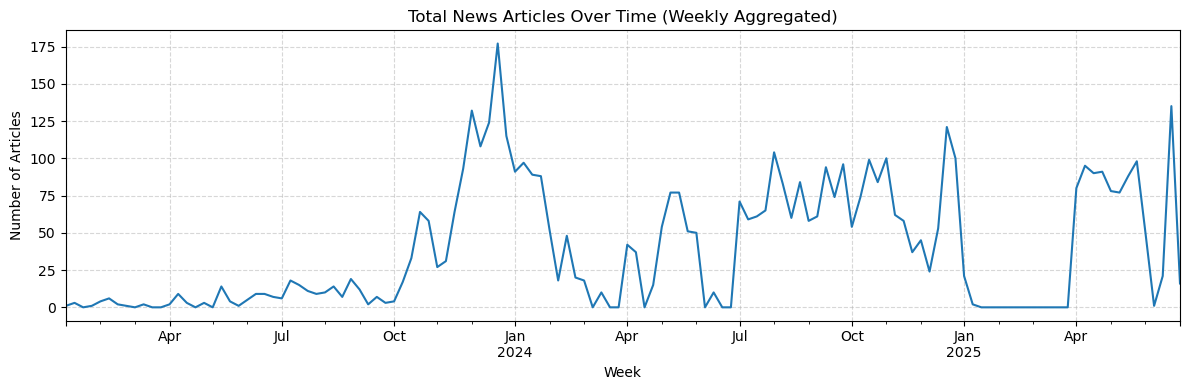

In [30]:
# Group and resample by week
news_df.set_index('date', inplace=True)
weekly_counts = news_df.resample('W').size()

# Plot weekly smoothed version
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
weekly_counts.plot()
plt.title("Total News Articles Over Time (Weekly Aggregated)")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From October 2023 onward, article volume shows sustained activity with several dips and recoveries.


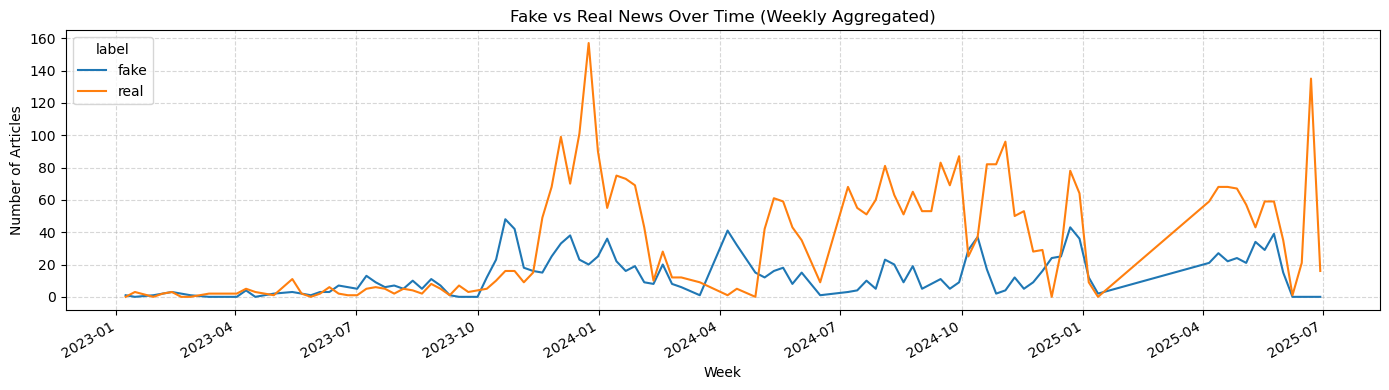

In [31]:
# Weekly count by label
weekly_label_counts = news_df.groupby([pd.Grouper(freq='W'), 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 4))
weekly_label_counts.plot(ax=plt.gca())
plt.title("Fake vs Real News Over Time (Weekly Aggregated)")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Real news consistently dominates volume. Fake news exhibits sharp, sporadic spikes‚Äîespecially in late 2023 and early 2025.


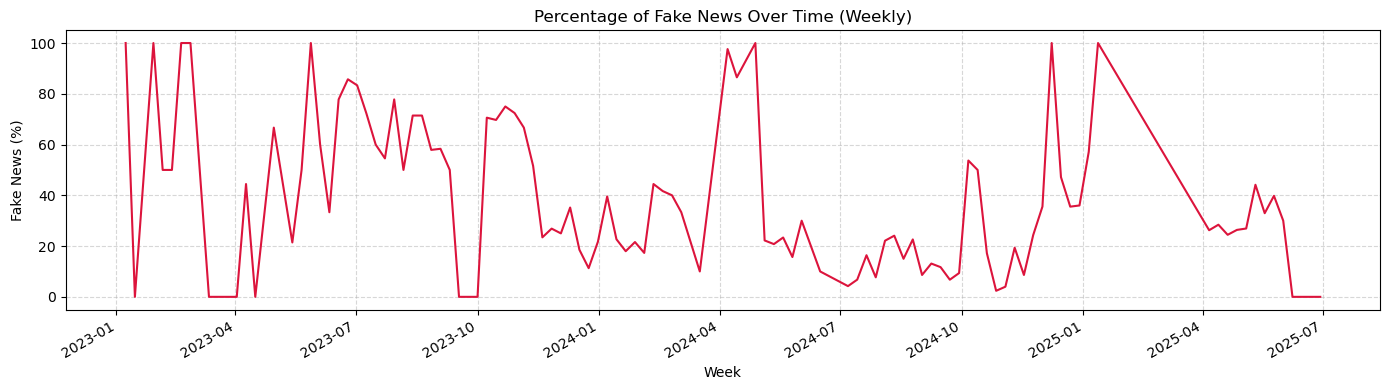

In [32]:
# Compute % of fake news weekly
weekly_pct = weekly_label_counts.copy()
weekly_pct['fake_pct'] = (weekly_pct['fake'] / weekly_pct.sum(axis=1)) * 100

plt.figure(figsize=(14, 4))
weekly_pct['fake_pct'].plot(color='crimson')
plt.title("Percentage of Fake News Over Time (Weekly)")
plt.ylabel("Fake News (%)")
plt.xlabel("Week")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In some weeks, fake news makes up 80‚Äì100% of all articles‚Äîoften during social/media-driven misinformation bursts.


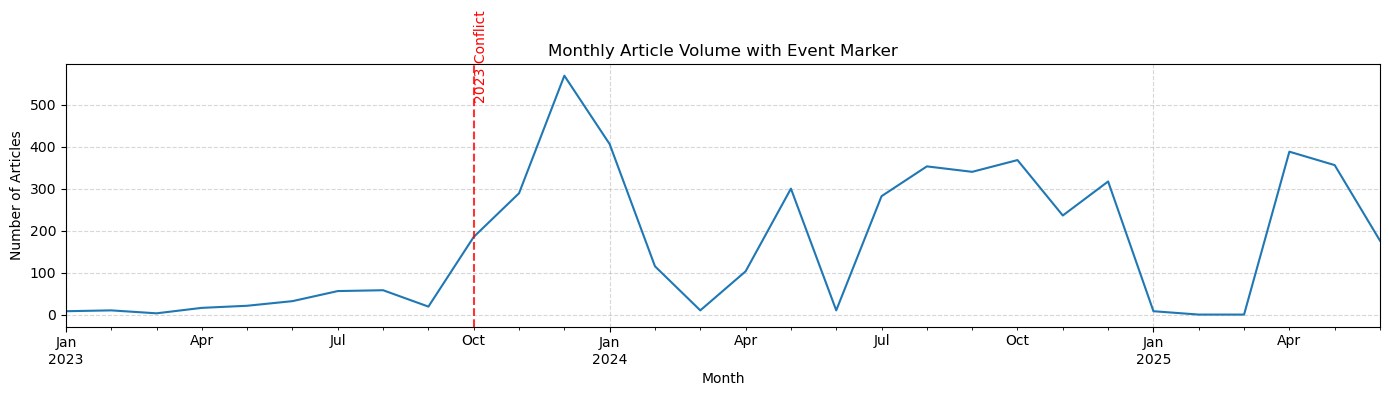

In [33]:
# Monthly total
monthly = news_df.resample('M').size()

plt.figure(figsize=(14, 4))
monthly.plot()
plt.axvline(pd.to_datetime('2023-10-07'), color='red', linestyle='--', alpha=0.8)
plt.text(pd.to_datetime('2023-10-07'), monthly.max()*0.9, '2023 Conflict', rotation=90, color='red')
plt.title("Monthly Article Volume with Event Marker")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The spike aligns exactly with the October 2023 Gaza-Israel conflict. Media attention remains elevated throughout 2024‚Äì2025.


### Final Observations

- **Time Filtering**: Pre-2023 articles were removed to avoid distortion and focus on current conflict-related patterns.
- **Conflict-Driven Spikes**: Sharp surges in news activity follow real-world crises (Oct 2023).
- **Fake News Patterns**: Fake news surges in bursts, likely tied to viral moments or disinfo campaigns.
- **Feature Opportunity**: Time is a strong contextual feature ‚Äî we‚Äôll engineer features like `month`, `is_post_war`, and `week` to help our model understand temporal signals.

## 7. Final Summary & Next Steps

This exploratory data analysis examined over 5,300 Palestinian news articles (2023‚Äì2025) from verified and unverified sources. Through structured cleaning and domain-informed insights, we uncovered patterns in source credibility, lexical style, temporal shifts, and content structure that inform our downstream fake news detection pipeline.

---

### ‚úÖ Data Cleaning Summary

- **Dropped Duplicates**:
  - 301 duplicate headlines
  - 23 duplicate content rows
- **Renamed Columns** for consistency:
  - `News content` ‚Üí `content`
  - `Label` ‚Üí `label` (lowercase)
- **Converted Types**:
  - `date` ‚Üí `datetime`
- **Removed Irrelevant Articles**:
  - 17 non-Palestine articles from 2011‚Äì2020 excluded
- **Text Columns Cleaned**:
  - Stopword removal for lexical analysis
  - Unicode cleanup and Arabic reshaping for visualization
- **Feature Engineering**:
  - `title_length` and `content_length` extracted
  - `platform_grouped` created for handling rare sources

---

### üìä Key Insights from EDA

- **Platform Bias**:
  - Al Jazeera dominates real news
  - Misbar, Tibyan, and social platforms drive fake content
- **Lexical Patterns**:
  - Real news uses terms tied to geopolitics (e.g., "ÿßŸÑŸÖŸÇÿßŸàŸÖÿ©", "ÿßŸÑÿßÿ≠ÿ™ŸÑÿßŸÑ")
  - Fake news leans toward viral/social terms ("ŸÅŸäÿØŸäŸà", "ŸÖŸÇÿ∑ÿπ")
- **Text Length**:
  - Real articles are longer and more diverse
  - Fake articles are brief and repetitive
- **Temporal Trends**:
  - Strong spike after October 2023 conflict
  - Fake news exhibits bursty behavior tied to real-world events

---

### üîß Next Steps

#### Data Preparation (`cleaner.py`)
- Move all transformation logic from notebook into pipeline-ready functions:
  - Rename, drop duplicates, type conversion
  - Remove outliers using IQR or z-score (e.g., `content_length`)
  - Add engineered features (`length`, `platform_grouped`, `is_post_conflict`)
- Export cleaned dataset: `data/merged_cleaned.csv`

#### Modeling Pipeline
- Vectorize Arabic text using TF-IDF or embeddings
- Experiment with models (Naive Bayes, Logistic Regression, SVM, etc.)
- Handle imbalance using:
  - Class weighting
  - Oversampling (SMOTE or simple duplication)
  - Threshold moving

#### Feature Engineering (Advanced)
- Add features like:
  - `title_verb_ratio`
  - `platform_encoded`
  - `content_length_log`
  - `keyword_presence_flags`

#### Deployment-Readiness
- Save trained model to `/models/`
- Build a minimal `app/` with:
  - Input form (text or URL)
  - Prediction + confidence
  - Label explanation
